In [1]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [2]:
ALL_DATA = []

In [3]:
# 网页的解析函数
def parse_page(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) '
                      'AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    text = response.content.decode('utf-8')
    soup = BeautifulSoup(text, 'html5lib')  # 由于html5lib容错性较好因此用它不用lxml
    conMidtab = soup.find('div', class_='conMidtab')
    tables = conMidtab.find_all('table')
    # 查看是否拿到了每个城市的天气
    for table in tables:
        trs = table.find_all('tr')[2:]
        for index, tr in enumerate(trs):
            tds = tr.find_all('td')
            city_td = tds[0]
            if index == 0:
                city_td = tds[1]
            city = list(city_td.stripped_strings)[0]  # 获取标签里面的字符串属性返回一个生成器,因此要转化为一个列表
            temp_td = tds[-2]
            min_temp = list(temp_td.stripped_strings)[0]

In [4]:
def main():
    urls = [
        'http://www.weather.com.cn/textFC/hb.shtml',
        'http://www.weather.com.cn/textFC/db.shtml',
        'http://www.weather.com.cn/textFC/hz.shtml',
        'http://www.weather.com.cn/textFC/hn.shtml',
        'http://www.weather.com.cn/textFC/hd.shtml',
        'http://www.weather.com.cn/textFC/xb.shtml',
        'http://www.weather.com.cn/textFC/xn.shtml',
        'http://www.weather.com.cn/textFC/gat.shtml'
    ]
    for url in urls:
        parse_page(url)
    # 分析数据，根据最低气温进行排序
    ALL_DATA.sort(key=lambda data: data['最低气温'])
    data = ALL_DATA[0:10]  # 取出前10的最低气温及其城市
    return data

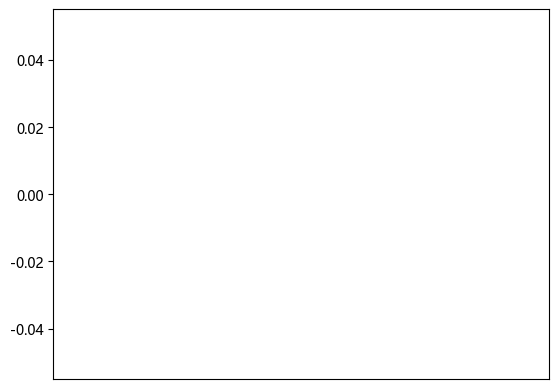

In [5]:
datas = main()
city = []
temp = []
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
for data in datas:
    city.append(data['城市'])
    temp.append(data['最低气温'])
plt.bar(range(len(city)), temp, tick_label=city)
plt.show()